#Parte 1
Prueba con una imagen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

from skimage.feature import hog
from skimage import exposure
from sklearn.decomposition import PCA

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Vision por Computador/Semana7/images/149b.jpg')

In [ ]:
def graph(gra):
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title("Original")
  plt.subplot(1, 2, 2)
  plt.imshow(cv2.cvtColor(gra, cv2.COLOR_BGR2RGB))
  plt.title("Imagen:")
  plt.show()

In [ ]:
def graficar(titulo1,titulo2,img1,img2):
  plt.subplot(121), plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
  plt.title('titulo1'), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
  plt.title('titulo2'), plt.xticks([]), plt.yticks([])
  plt.show()

In [ ]:
def convertir_a_hsv(imagen):
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
    return imagen_hsv

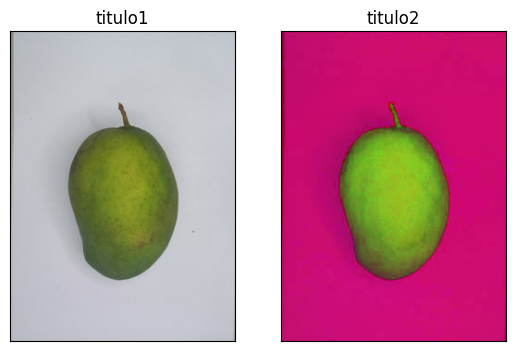

In [ ]:
img3=convertir_a_hsv(image)
graficar("Original","HSV",image,img3)

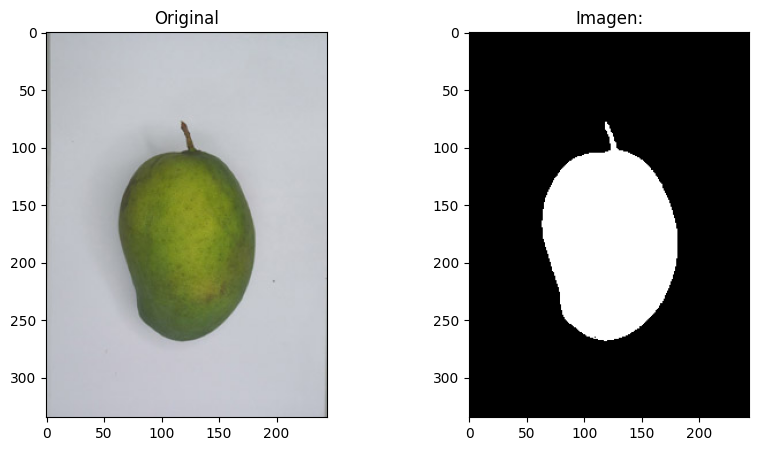

In [ ]:
def crear_imagen_binaria_rojo(hsv):
    # Definir el rango de color para el rojo en HSV
    rango_rojo_bajo = np.array([0, 0, 100])
    rango_rojo_alto = np.array([180, 50, 255])

    #rango_rojo_alto = np.array([0, 10, 205])
    #rango_rojo_bajo = np.array([210, 15, 170])

    # Crear máscara para el rojo
    mascara_rojo = cv2.inRange(hsv, rango_rojo_bajo, rango_rojo_alto)

    # Crear una imagen binaria usando la máscara
    imagen_binaria = np.zeros_like(hsv[:,:,0])
    imagen_binaria[mascara_rojo == 0] = 255

    return imagen_binaria
imagen_binaria2 = crear_imagen_binaria_rojo(img3)
graph(imagen_binaria2)

In [ ]:
def HOG(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  hog_features, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
  return(hog_features, hog_image)
vector_hog=(HOG(image)[1])

Este (descriptor HOG) podría servir con el canal verde (ya que los mangos son de color verde o amarillo (el amarillo tiene algo de verde)), sin embargo, la descripción de color no es relevante con respecto al peso de un mango

In [ ]:
def Hu_Moments(img):
  #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = img.copy()
  M = cv2.moments(gray)
  centroid_x=int(M["m10"] / M["m00"])
  centroid_y=int(M["m01"] / M["m00"])
  hu = cv2.HuMoments(M)
  # Log transformación de los momentos Hu para hacerlos invariantes a la escala, rotación y traslación
  for i in range(0, 7):
      hu[i] = -1 * cv2.log(abs(hu[i]))
  return(hu)

In [ ]:
hmoments = Hu_Moments(imagen_binaria2)
hmoments

array([[ 7.29994998],
       [16.61449603],
       [27.11569532],
       [30.72537144],
       [59.93204776],
       [39.53964782],
       [60.06122999]])

###Se han extraído exitosamente los momentos de una imagen binaria segmentada

#Parte 2
Masivamente con todas las imágenes

Primero se crea un DataFrame, la columna de Mass(kg) es la variable a predecir y se agregan los momentos que serían las variables de entrenamiento



In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Vision por Computador/Semana7/Harumanis_mango_weight_grade.xlsx')
print(df)

     Fruit No Color_K-Yellow_P_Green Fruit Grade  Mass(kg)
0      1a.jpg                      P           2      0.50
1      2a.jpg                      P           2      0.50
2      3a.jpg                      P           2      0.35
3      4a.jpg                      P           2      0.45
4      5a.jpg                      P           2      0.50
..        ...                    ...         ...       ...
543  270b.jpg                      P           P      0.45
544  271b.jpg                      P           P      0.45
545  272b.jpg                      P           P      0.50
546  273b.jpg                      P           P      0.45
547  274b.jpg                      P           P      0.55

[548 rows x 4 columns]


In [ ]:
ruta = '/content/drive/MyDrive/Vision por Computador/Semana7/images/'

In [ ]:
scaler = MinMaxScaler()
tupla_normalizada = scaler.fit_transform(Hu_Moments(imagen_binaria2))
momentos={'Momento 1': [],'Momento 2': [],'Momento 3': [],'Momento 4': [],'Momento 5': [],'Momento 6': [],'Momento 7': []}
for i in df['Fruit No']:
  for j in range(7):
    momentos["Momento "+str(j+1)].append(Hu_Moments(crear_imagen_binaria_rojo(convertir_a_hsv(cv2.imread(ruta+str(i)))))[j][0])
df['Momento 1'] = momentos["Momento 1"]
df['Momento 2'] = momentos["Momento 2"]
df['Momento 3'] = momentos["Momento 3"]
df['Momento 4'] = momentos["Momento 4"]
df['Momento 5'] = momentos["Momento 5"]
df['Momento 6'] = momentos["Momento 6"]
df['Momento 7'] = momentos["Momento 7"]
print(df.dtypes)
df

Fruit No                   object
Color_K-Yellow_P_Green     object
Fruit Grade                object
Mass(kg)                  float64
Momento 1                 float64
Momento 2                 float64
Momento 3                 float64
Momento 4                 float64
Momento 5                 float64
Momento 6                 float64
Momento 7                 float64
dtype: object


,Fruit No,Color_K-Yellow_P_Green,Fruit Grade,Mass(kg),Momento 1,Momento 2,Momento 3,Momento 4,Momento 5,Momento 6,Momento 7
0,1a.jpg,P,2,0.50,7.271577,16.221095,26.763127,29.387125,57.768772,37.939025,57.852368
1,2a.jpg,P,2,0.50,7.307197,16.711504,26.343765,29.544615,57.947007,38.457999,57.744180
2,3a.jpg,P,2,0.35,7.311180,16.791846,26.246708,29.271557,57.570009,38.312910,57.238492
3,4a.jpg,P,2,0.45,7.325964,17.052833,26.034997,29.585034,58.063860,39.076544,57.547273
4,5a.jpg,P,2,0.50,7.288311,16.429434,26.625901,29.700371,59.702124,41.821465,57.876316
...,...,...,...,...,...,...,...,...,...,...,...
543,270b.jpg,P,P,0.45,7.289062,16.434837,26.585675,29.540609,58.101673,38.363098,57.834301
544,271b.jpg,P,P,0.45,7.326475,17.083853,25.958813,29.595632,58.246102,39.147974,57.468668
545,272b.jpg,P,P,0.50,7.253285,16.122388,25.392204,28.041653,56.644373,38.983446,54.770225
546,273b.jpg,P,P,0.45,7.275149,16.284825,25.834675,28.617680,56.371870,37.605044,56.057586


#Parte 3:
Entrenamiento

In [ ]:
features = df[['Momento 1', 'Momento 2', 'Momento 3', 'Momento 4', 'Momento 5','Momento 6']]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

df_normalized = pd.DataFrame(normalized_features, columns=features.columns)

# Si es necesario, puedes unir la variable objetivo al DataFrame normalizado
df_normalized['Mass(kg)'] = df['Mass(kg)']

print("DataFrame con características normalizadas:")
df_normalized

DataFrame con características normalizadas:


,Momento 1,Momento 2,Momento 3,Momento 4,Momento 5,Momento 6,Mass(kg)
0,0.799737,0.240764,0.402038,0.532563,0.474519,0.440823,0.50
1,0.892313,0.478926,0.334063,0.546075,0.482317,0.475086,0.50
2,0.902663,0.517943,0.318331,0.522647,0.465823,0.465507,0.35
3,0.941084,0.644689,0.284015,0.549543,0.487430,0.515922,0.45
4,0.843228,0.341941,0.379795,0.559439,0.559108,0.697143,0.50
...,...,...,...,...,...,...,...
543,0.845179,0.344565,0.373275,0.545731,0.489084,0.468821,0.45
544,0.942413,0.659753,0.271666,0.550452,0.495403,0.520638,0.45
545,0.752199,0.192828,0.179824,0.417123,0.425324,0.509776,0.50
546,0.809021,0.271714,0.251544,0.466545,0.413401,0.418774,0.45


*Se crea un nuevo DataFrame con los datos normalizados para entrenar el modelo*

In [ ]:
from scipy.stats import spearmanr
from pandas.api.types import is_numeric_dtype
for c in df_normalized.columns[:-1]:
 if is_numeric_dtype(df_normalized[c]):
  correlation, pvalue = spearmanr(df_normalized[c], df_normalized['Mass(kg)'])
  print(f'{c}: {correlation : .4f}, significant: {pvalue <= 0.05}')

Momento 1: -0.2892, significant: True
Momento 2: -0.2915, significant: True
Momento 3:  0.1239, significant: True
Momento 4: -0.0256, significant: False
Momento 5:  0.0119, significant: False
Momento 6: -0.0734, significant: False


*Correlación de cada una de las variables, no se usarán las variables de momento 4,5 y 6 ya que tienen poca correlación*



In [ ]:
#X = df[['Momento 1', 'Momento 2', 'Momento 3', 'Momento 4', 'Momento 5','Momento 6']]
X = df_normalized[['Momento 1', 'Momento 2', 'Momento 3']]
y = df_normalized['Mass(kg)']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
##Estimación del modelo usando Python mediante la función LinearRegresion()

from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

In [ ]:
##Entrenamiento del modelo

lin_reg= linearRegression.fit(X_train, y_train)

In [ ]:
# Visualizar los coeficientes
print('Coeficientes: ', lin_reg.coef_)

# Visualizar el valor del intercepto
print('Intercepto: ', lin_reg.intercept_)

Coeficientes:  [ 0.00359955 -0.02529299  0.00579745]
Intercepto:  0.4710182767624021


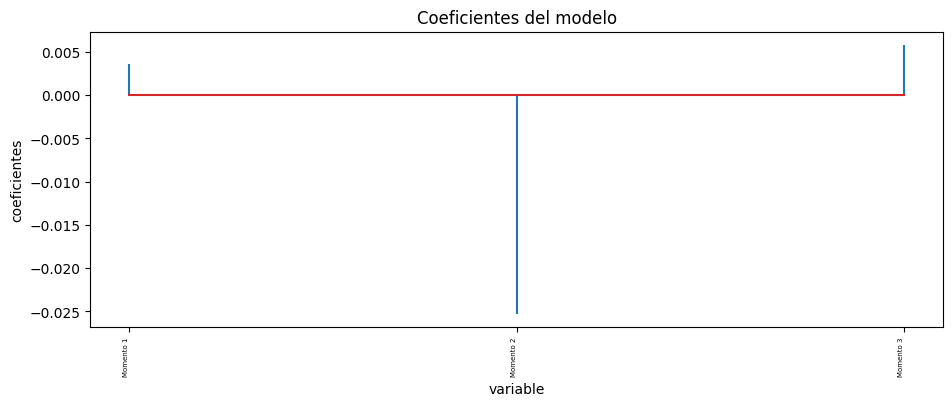

In [ ]:
# Coeficientes del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': X.columns,
                         'coef': lin_reg.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [ ]:
##Evaluación capacidad predictiva modelo

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.06169044500073196
MSE: 0.005932628196917217
RMSE: 0.07702355611705562
R2 Square 0.16237365442622131
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.06707832814644918
MSE: 0.007000614475725745
RMSE: 0.08366967476765848
R2 Square 0.07393614323574971
__________________________________


In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.06169,0.005933,0.077024,0.162374,-0.215608


In [ ]:
df_normalized['Predecido'] = lin_reg.predict(X)
df_normalized[['Mass(kg)', 'Predecido']]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,Mass(kg),Predecido
0,0.50,0.470138
1,0.50,0.464053
2,0.35,0.463013
3,0.45,0.459746
4,0.50,0.467607
...,...,...
543,0.45,0.467510
544,0.45,0.459298
545,0.50,0.469891
546,0.45,0.468516
